# 7.5 Aprendizaje de Máquina: Regresión Lineal
<a href="https://colab.research.google.com/github/andrescastro-itm/C1_fundamentosProgramacion/blob/main/7_5_AprendizajeMaquina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

np.random.seed(seed=0)

## Creación de datos sintéticos

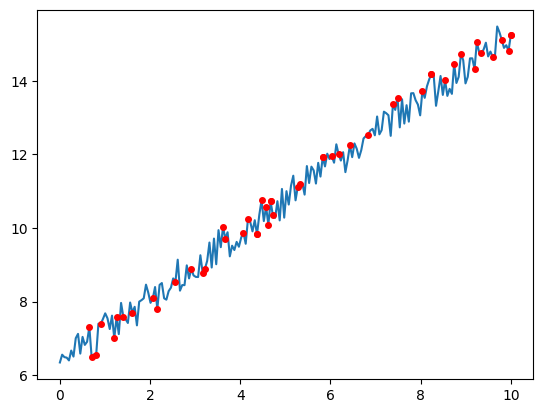

In [2]:
w1_verdadero = 0.9
w0_verdadero = 5.8
D = lambda x: w1_verdadero*x + w0_verdadero #función para generar puntos

t = np.linspace(0,10,200) #rango de x

TT = D(t)+np.random.rand(200) #generar datos (sumarle aleatoriedad)

fig = plt.figure()
plt.plot(t,TT)

#Escoger únicamente nd datos
per = np.random.randint(0,200,200)
nd = 50
X = t[per[:nd]]
y = TT[per[:nd]]
y = np.expand_dims(y,axis=1) #Vector columna

plt.plot(X,y,'or',markersize=4)
plt.show()

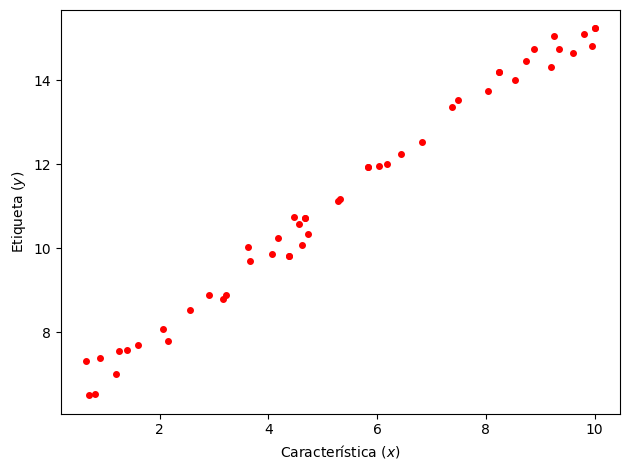

In [3]:
fig = plt.figure()
plt.plot(X,y,'or',markersize=4)
plt.ylabel('Etiqueta ($y$)')
plt.xlabel('Característica ($x$)')
plt.tight_layout()
plt.show()

## Flujo de ejecución del entrenamiento

    w1 = 0, w0 = 0
    CICLO WHILE max_iter veces (épocas):
        CICLO FOR N veces:
            <Calcular error actual>
            <Calcular dirección de mejora (gradientes)>
        SI error no supera una tolerancia:
            INTERRUMPIR CICLO (break)
        w1 = w1 – dirección_w1 * tasa_aprendizaje
        w0 = w0 – dirección_w0 * tasa_aprendizaje


## Solución con gradiente descendente y ciclo for para sumatoria

Recordemos la función de costo a minimizar:

$$J(w_0,w_1) = \dfrac{1}{n}\sum\limits_{i=1}^{n} \left(y_i - \left(w_1x_i + w_0\right)\right)^2$$

con:

- $y_i$: Etiqueta del $i$-ésimo dato
- $x_i$: $i$-ésimo dato
- $w_1$: pendiente (coeficiente de característica 1)
- $w_0$: intercepto (bias)

In [4]:
def calcular_costo_con_for(X, y, w1, w0):
    """
    Calcula el costo (MSE) usando un ciclo for
    Aplicación: sumatoria como ciclo for
    """
    total = 0
    n = len(X)

    # CONCEPTO CLAVE: Sumatoria como ciclo for
    for i in range(n):
        # Predicción usando la ecuación de la línea
        prediccion = w1 * X[i] + w0

        # Error cuadrático
        error = y[i] - prediccion
        error_cuadrado = error ** 2

        # Acumular en la sumatoria
        total += error_cuadrado

    # Promedio (Mean Squared Error)
    mse = total / n
    return mse

Ejemplo:
MSE = 27.05


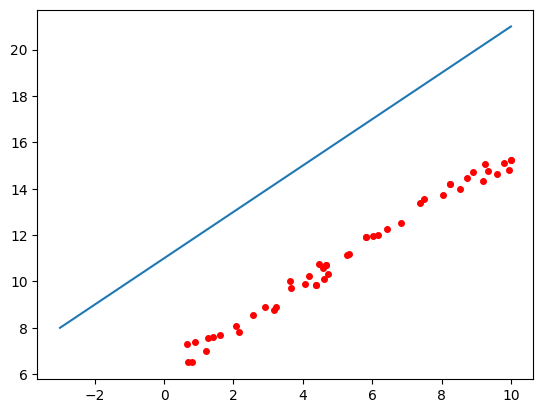

In [5]:
print("Ejemplo:")
w1 = 1
w0 = 11
costo = calcular_costo_con_for(X, y, w1, w0)
print(f"MSE = {costo[0]:.2f}")

fig = plt.figure()
plt.plot(X,y,'or',markersize=4)
plt.plot([-3,10],[w1 * -3 + w0, w1 * 10 + w0])
plt.show()

Para aplicar gradiente descendente, requerimos las derivadas de la función de costo en función de los parámetros de la regresión lineal:

$$\dfrac{\partial J(w_0,w_1)}{\partial w_0} = \dfrac{1}{n}\sum\limits_{i=1}^{n} -2\left(y_i - \left(w_1x_i + w_0\right)\right)$$

$$\dfrac{\partial J(w_0,w_1)}{\partial w_1} = \dfrac{1}{n}\sum\limits_{i=1}^{n} -2\left(y_i - \left(w_1x_i + w_0\right)\right)x_i$$

De esta forma, la actualización de parámetros se realiza de la siguiente manera:

$$w_1 = w_1 - \alpha \dfrac{\partial J(w_0,w_1)}{\partial w_1}$$
$$w_0 = w_0 - \alpha \dfrac{\partial J(w_0,w_1)}{\partial w_0}$$

con $\alpha$ una tasa de apredizaje mayor que cero.


In [6]:
def gradiente_descendente_con_while(X, y, lr=0.01, max_iter=1000, tolerancia=1e-6):
    """
    Implementa gradiente descendente usando while loop
    Aplicación: while loop, criterio de parada con if
    """
    # Inicialización
    w1, w0 = 0, 0  # Parámetros iniciales
    n = len(X)

    # Listas para guardar el progreso
    costos = []
    parametros_w1 = []
    parametros_w0 = []

    # CONCEPTO CLAVE: While loop con criterio de parada
    iteracion = 0

    while iteracion < max_iter:
        # Calcular costo actual
        costo_actual = calcular_costo_con_for(X, y, w1, w0)

        # Guardar progreso
        costos.append(costo_actual)
        parametros_w1.append(w1)
        parametros_w0.append(w0)

        # CONCEPTO CLAVE: Criterio de parada con if
        if iteracion > 0 and abs(costos[-1] - costos[-2]) < tolerancia:
            break

        # Calcular gradientes usando ciclos for
        grad_w1 = 0
        grad_w0 = 0

        for i in range(n):
            prediccion = w1 * X[i] + w0
            error = y[i] - prediccion

            # Gradientes de la función de costo
            grad_w1 += -2 * error * X[i]
            grad_w0 += -2 * error

        # Promediar gradientes
        grad_w1 /= n
        grad_w0 /= n

        # Actualizar parámetros
        w1 = w1 - lr * grad_w1
        w0 = w0 - lr * grad_w0

        iteracion += 1

    return w1, w0, costos, parametros_w1, parametros_w0


In [7]:
start_time = time.time()
w1_final, w0_final, costos_historia, w1_historia, w0_historia = gradiente_descendente_con_while(X, y)
tiempo_for = time.time() - start_time

print(f"w1 estimado = {w1_final.item():.2f}, w0 estimado = {w0_final.item():.2f}")
print(f"w1_verdadero = {w1_verdadero:.2f}, w0_verdadero = {w0_verdadero:.2f}")
print(f"Tiempo de ejecución: {tiempo_for:.2f} segundos")

w1 estimado = 0.93, w0 estimado = 6.15
w1_verdadero = 0.90, w0_verdadero = 5.80
Tiempo de ejecución: 2.18 segundos


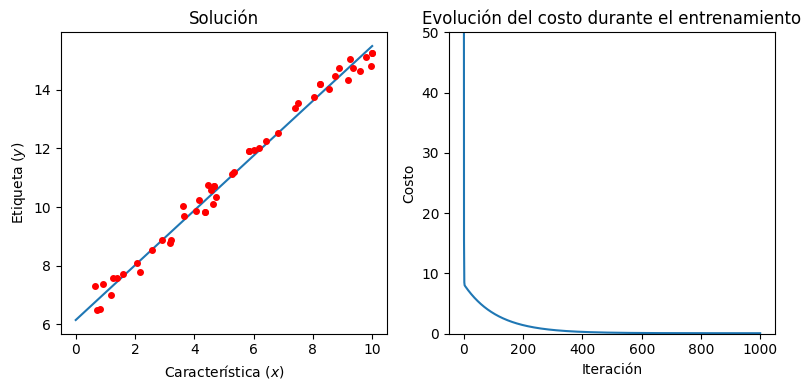

In [8]:
fig = plt.subplots(1,2,figsize=(8,4))
plt.subplot(1,2,1)
plt.plot([0,10],[w1_final.item() * 0 + w0_final.item(), w1_final.item() * 10 + w0_final.item()])
plt.plot(X,y,'or',markersize=4)
plt.ylabel('Etiqueta ($y$)')
plt.xlabel('Característica ($x$)')
plt.title('Solución')

plt.subplot(1,2,2)
plt.plot(costos_historia)
plt.ylim(0,50)
plt.xlabel('Iteración')
plt.ylabel('Costo')
plt.title('Evolución del costo durante el entrenamiento')
plt.tight_layout()
plt.show()

In [9]:
%%timeit
w1_final, w0_final, costos_historia, w1_historia, w0_historia = gradiente_descendente_con_while(X, y)

1.3 s ± 726 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
i = 0
fig, ax = plt.subplots()
line1, = ax.plot(X,y,'or',markersize=4)
line2, = ax.plot([],[])
plt.close(fig)

def anim(i):
    w1 = w1_historia[i]
    w0 = w0_historia[i]
    line2.set_data([-3,10],[w1 * -3 + w0, w1 * 10 + w0])
    return (line2,)

RL_GD = animation.FuncAnimation(fig, func=anim, frames=len(w1_historia), interval=200, blit=True)
HTML(RL_GD.to_jshtml())

## Regresión Lineal con Álgebra Lineal

In [11]:
#Matriz extendida

o = np.ones(nd)
X = X.reshape(nd)
X1 = np.stack((o,X),axis = 1)

In [12]:
def calcular_costo_vectorizado(X, y, w):
    """
    Versión vectorizada usando producto punto
    Aplicación: producto punto para acelerar cómputo
    """
    # CONCEPTO CLAVE: Operaciones vectorizadas
    predicciones = X@w   # Vectorizado: opera sobre todo el array
    errores = y - predicciones  # Vectorizado

    # CONCEPTO CLAVE: Producto punto para sumar cuadrados
    suma_errores_cuadrados = np.dot(errores.T, errores)  # Producto punto

    mse = suma_errores_cuadrados / len(X)
    return mse.item()

Ejemplo:
MSE = 27.05


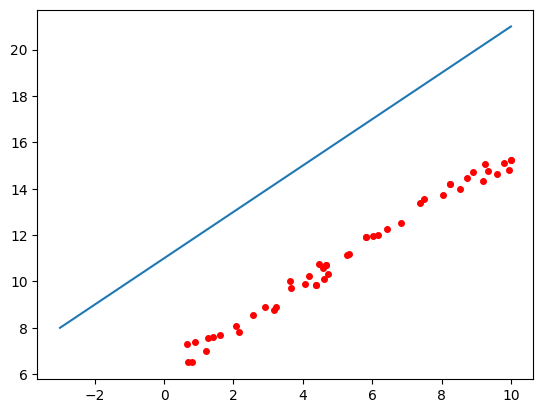

In [13]:
print("Ejemplo:")
w1 = 1
w0 = 11
w = np.array([[w0],[w1]])
costo = calcular_costo_vectorizado(X1, y, w)
print(f"MSE = {costo:.2f}")

fig = plt.figure()
plt.plot(X,y,'or',markersize=4)
plt.plot([-3,10],[w1 * -3 + w0, w1 * 10 + w0])
plt.show()

In [14]:
def gradiente_descendente_vectorizado(X, y, lr=0.01, max_iter=1000, tolerancia=1e-6):
    """
    Implementa gradiente descendente usando while loop
    Aplicación: while loop, criterio de parada con if
    """
    # Inicialización
    w = np.zeros((X.shape[1],1))  # Parámetros iniciales
    n = len(X)

    # Listas para guardar el progreso
    costos = []
    parametros_w1 = []
    parametros_w0 = []

    # CONCEPTO CLAVE: While loop con criterio de parada
    iteracion = 0

    while iteracion < max_iter:
        # Calcular costo actual
        costo_actual = calcular_costo_vectorizado(X, y, w)
        costos.append(costo_actual)

        if iteracion > 0 and abs(costos[-1] - costos[-2]) < tolerancia:
            break

        # CONCEPTO CLAVE: Gradiente vectorizado
        # Gradiente = -2 * X^T * errores / n
        predicciones = np.dot(X, w)  # Producto matriz-vector
        errores = y - predicciones
        gradientes = -2 * np.dot(X.T, errores) / n

        # Actualización vectorizada
        w = w - lr * gradientes

        # Guardar progreso
        costos.append(costo_actual)
        parametros_w1.append(w[1])
        parametros_w0.append(w[0])
        iteracion += 1

    return w[1], w[0], costos, parametros_w1, parametros_w0


In [15]:
start_time = time.time()
w1_final, w0_final, costos_historia, w1_historia, w0_historia = gradiente_descendente_vectorizado(X1, y)
tiempo_for = time.time() - start_time

print(f"w1 estimado = {w1_final.item():.2f}, w0 estimado = {w0_final.item():.2f}")
print(f"w1_verdadero = {w1_verdadero:.2f}, w0_verdadero = {w0_verdadero:.2f}")
print(f"Tiempo de ejecución: {tiempo_for:.2f} segundos")

w1 estimado = 0.93, w0 estimado = 6.15
w1_verdadero = 0.90, w0_verdadero = 5.80
Tiempo de ejecución: 0.03 segundos


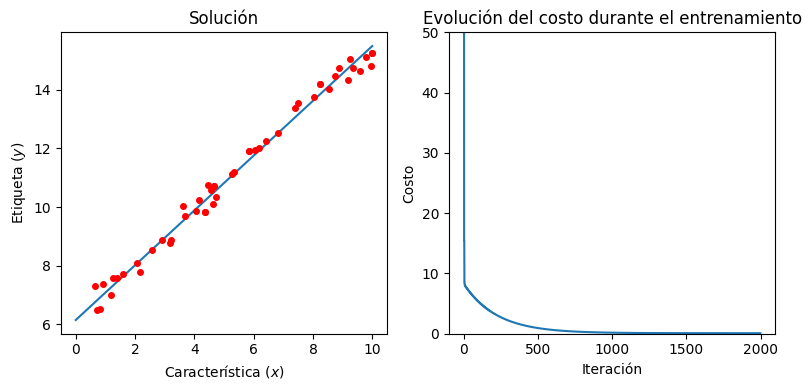

In [16]:
fig = plt.subplots(1,2,figsize=(8,4))
plt.subplot(1,2,1)
plt.plot([0,10],[w1_final.item() * 0 + w0_final.item(), w1_final.item() * 10 + w0_final.item()])
plt.plot(X,y,'or',markersize=4)
plt.ylabel('Etiqueta ($y$)')
plt.xlabel('Característica ($x$)')
plt.title('Solución')

plt.subplot(1,2,2)
plt.plot(costos_historia)
plt.ylim(0,50)
plt.xlabel('Iteración')
plt.ylabel('Costo')
plt.title('Evolución del costo durante el entrenamiento')
plt.tight_layout()
plt.show()

In [ ]:
i = 0
fig, ax = plt.subplots()
line1, = ax.plot(X,y,'or',markersize=4)
line2, = ax.plot([],[])
plt.close(fig)

def anim(i):
    w1 = w1_historia[i]
    w0 = w0_historia[i]
    line2.set_data([-3,10],[w1 * -3 + w0, w1 * 10 + w0])
    return (line2,)

RL_GD = animation.FuncAnimation(fig, func=anim, frames=len(w1_historia), interval=200, blit=True)
HTML(RL_GD.to_jshtml())

In [18]:
%%timeit
w1_final, w0_final, costos_historia, w1_historia, w0_historia = gradiente_descendente_vectorizado(X1, y)

27.3 ms ± 1.35 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
